In [1]:
#Importing libraries and reading dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv("Health Risk Data.csv")
dataset.head()

,LGA_ID,LGA_Name,Population_Density_Index,PHC_Access_Score,Sanitation_Deficit_Rate,Malaria_Prevalence_Rate,Poverty_Index,Rainfall_Index,Latitude,Longitude
0,LGA001,Abeokuta North,0.78,0.34,0.65,0.72,0.81,0.55,7.15,3.37
1,LGA002,Oshodi Isolo,0.92,0.88,0.21,0.15,0.12,0.22,6.54,3.35
2,LGA003,Enugu East,0.55,0.45,0.78,0.85,0.67,0.75,6.44,7.52
3,LGA004,Zaria Central,0.41,0.12,0.88,0.91,0.95,0.88,11.08,7.70
4,LGA005,Ibadan South,0.85,0.75,0.45,0.51,0.33,0.41,7.39,3.87


## EDA

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LGA_ID                    50 non-null     object 
 1   LGA_Name                  50 non-null     object 
 2   Population_Density_Index  50 non-null     float64
 3   PHC_Access_Score          50 non-null     float64
 4   Sanitation_Deficit_Rate   50 non-null     float64
 5   Malaria_Prevalence_Rate   50 non-null     float64
 6   Poverty_Index             50 non-null     float64
 7   Rainfall_Index            50 non-null     float64
 8   Latitude                  50 non-null     float64
 9   Longitude                 50 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.0+ KB


In [3]:
dataset.isnull().sum()

LGA_ID                      0
LGA_Name                    0
Population_Density_Index    0
PHC_Access_Score            0
Sanitation_Deficit_Rate     0
Malaria_Prevalence_Rate     0
Poverty_Index               0
Rainfall_Index              0
Latitude                    0
Longitude                   0
dtype: int64

In [4]:
dataset.duplicated().sum()

0

In [5]:
dataset.describe()

,Population_Density_Index,PHC_Access_Score,Sanitation_Deficit_Rate,Malaria_Prevalence_Rate,Poverty_Index,Rainfall_Index,Latitude,Longitude
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.650200,0.532800,0.595400,0.639400,0.579000,0.609400,8.011800,6.742800
std,0.212339,0.215322,0.228912,0.244277,0.256748,0.244977,2.592755,2.558195
min,0.250000,0.120000,0.100000,0.050000,0.050000,0.050000,4.660000,2.880000
25%,0.502500,0.385000,0.432500,0.512500,0.412500,0.485000,6.202500,4.840000
50%,0.660000,0.530000,0.625000,0.665000,0.590000,0.655000,7.320000,7.020000
75%,0.837500,0.687500,0.767500,0.825000,0.772500,0.777500,10.117500,7.700000
max,0.980000,0.950000,0.950000,0.980000,0.990000,0.990000,13.080000,13.170000


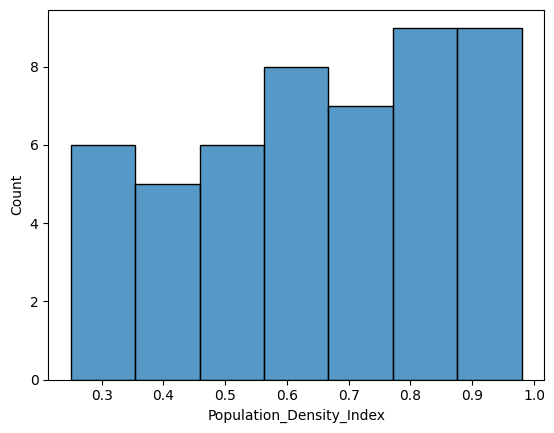

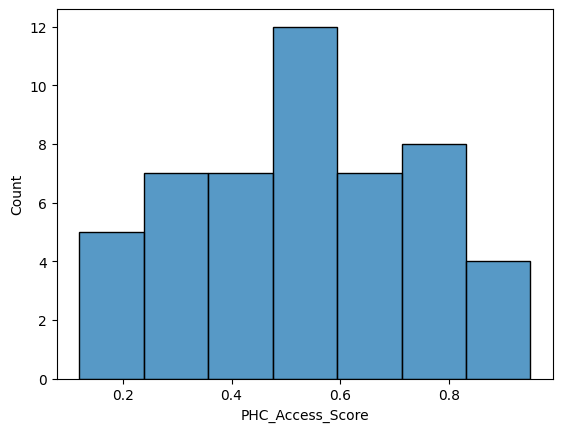

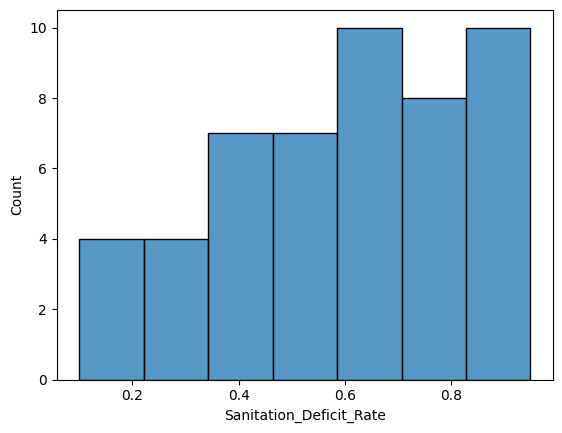

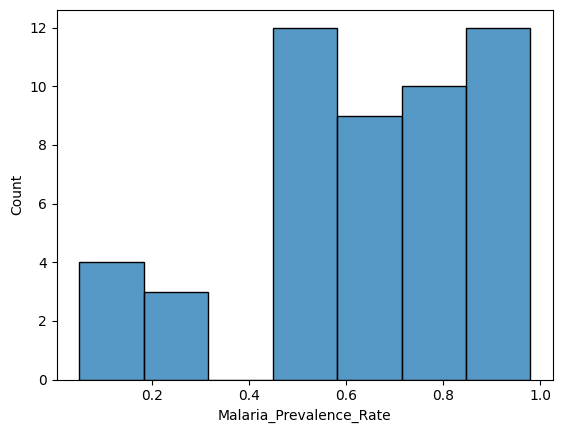

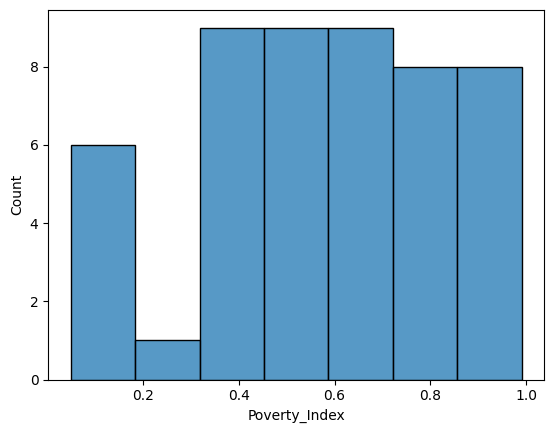

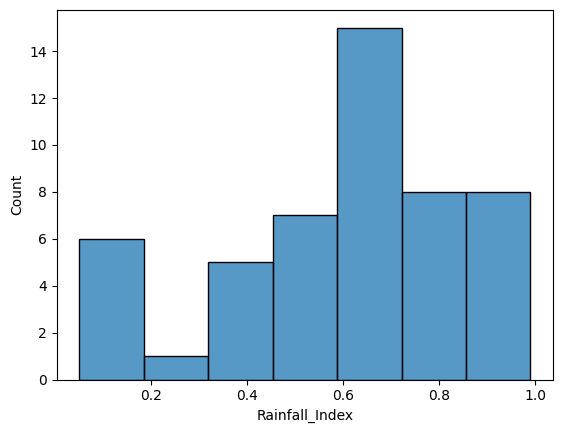

In [9]:
for col in dataset.columns[2:-2]:
    sns.histplot(dataset[col])
    plt.show()

## Cluster Analysis

In [18]:
#Preparing dataframe for clustering
X = dataset[dataset.columns[2:-2].drop("PHC_Access_Score")].copy()
X.loc[:, 'PHC_Access_Deficit'] = 1 - dataset['PHC_Access_Score']
X.head()

,Population_Density_Index,Sanitation_Deficit_Rate,Malaria_Prevalence_Rate,Poverty_Index,Rainfall_Index,PHC_Access_Deficit
0,0.78,0.65,0.72,0.81,0.55,0.66
1,0.92,0.21,0.15,0.12,0.22,0.12
2,0.55,0.78,0.85,0.67,0.75,0.55
3,0.41,0.88,0.91,0.95,0.88,0.88
4,0.85,0.45,0.51,0.33,0.41,0.25


In [20]:
#Standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
#importing Kmeans and writing a loop to fit models with 2 to 15 clusters to identify optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia_scores = []
silhouette_scores = []
for n_cluster in range(2, 16):
    kmeans = KMeans(n_clusters = n_cluster, n_init = 10, random_state = 42)
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

Text(0, 0.5, 'Inertia')

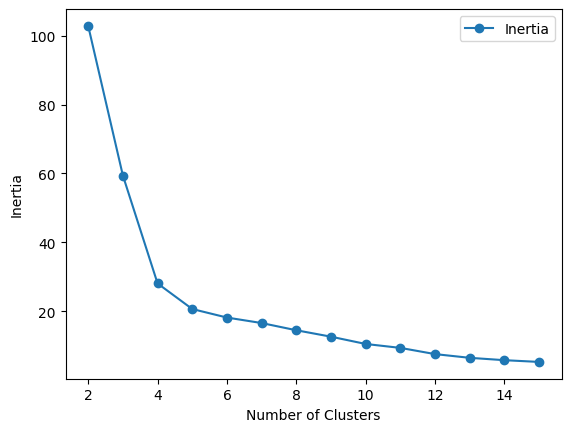

In [22]:
pd.DataFrame(data = inertia_scores, index = range(2, 16), columns = ["Inertia"]).plot(marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

Text(0, 0.5, 'Silhouette Score')

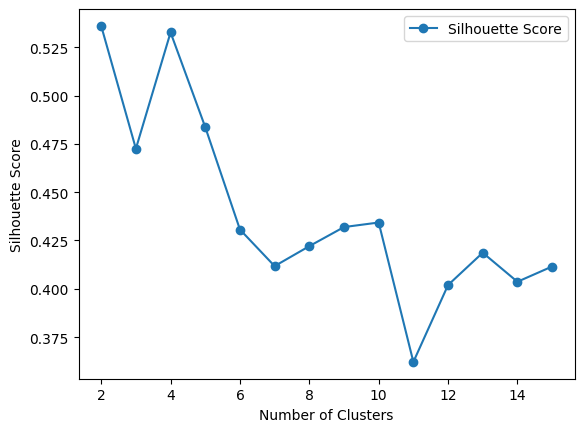

In [23]:
pd.DataFrame(data = silhouette_scores, index = range(2, 16), columns = ["Silhouette Score"]).plot(marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

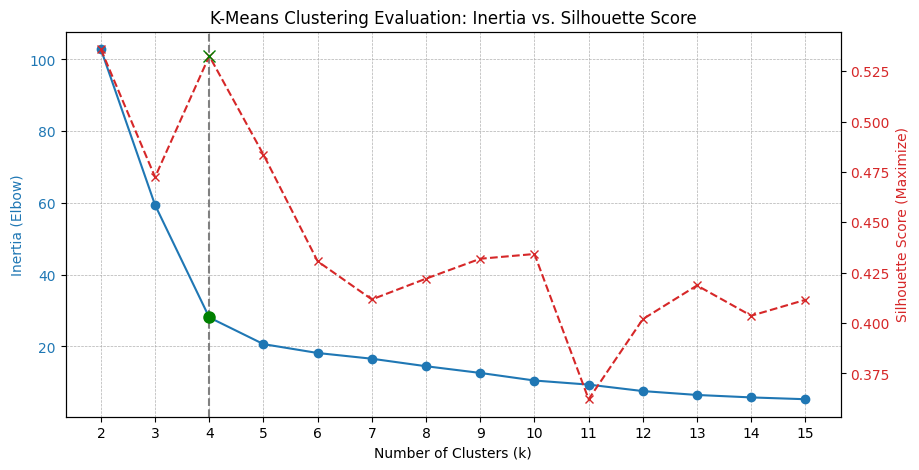

In [24]:
import matplotlib.pyplot as plt
import pandas as pd


# 1. Preparing data lists
k_values = range(2, 16)
silhouette = silhouette_scores
inertia = inertia_scores

# 2. Setting the plot with a primary axis (ax1) for Inertia
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Inertia (Elbow Method) on ax1
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Elbow)', color=color)
ax1.plot(k_values, inertia, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(k_values) # Ensure all k values are shown

# 3. Create a second Y-axis (ax2) sharing the same X-axis
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Silhouette Score (Maximize)', color=color)  
ax2.plot(k_values, silhouette, marker='x', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 4. Final Touches
plt.title('K-Means Clustering Evaluation: Inertia vs. Silhouette Score')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Highlight k=4
# Find the specific values for k=4 for the highlighting markers
inertia_at_k4 = inertia[2]
silhouette_at_k4 = silhouette[2]

ax1.axvline(x=4, color='gray', linestyle='--')
ax1.plot(4, inertia_at_k4, 'o', color='green', markersize=8)
ax2.plot(4, silhouette_at_k4, 'x', color='green', markersize=8)

plt.show() 

### KMeans == 4

In [27]:
kmeans4 = KMeans(n_clusters = 4, n_init = 10, random_state = 42)
kmeans4.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [28]:
from collections import Counter
labels = kmeans4.labels_
Counter(labels)

Counter({1: 20, 2: 13, 3: 10, 0: 7})

In [29]:
kmeans4.cluster_centers_

array([[ 1.35826871, -1.68179476, -1.95291624, -1.7609326 , -1.91787655,
        -1.48810086],
       [-0.23643635,  0.38877083,  0.38499471,  0.34622869,  0.37152305,
         0.28054361],
       [ 0.78948735, -0.69933264, -0.46194276, -0.58320165, -0.4225587 ,
        -0.73387378],
       [-1.50424895,  1.30884709,  1.19757753,  1.29835759,  1.1487938 ,
         1.43461931]])

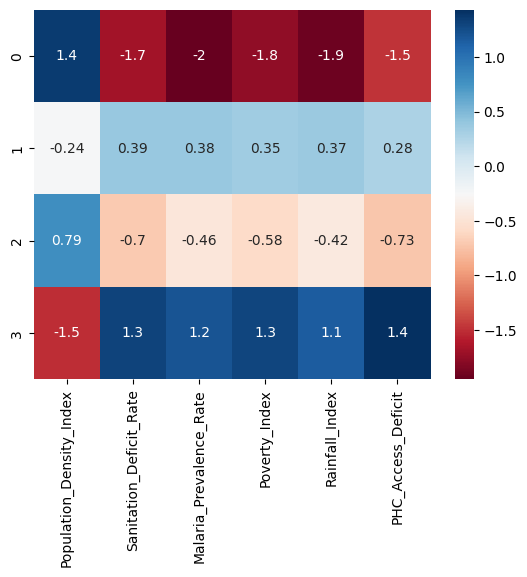

In [30]:
import seaborn as sns

cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns=X.columns)
sns.heatmap(cluster_centers4, cmap='RdBu', annot=True);

In [ ]:
# Cluster 0: High population but low poverty and access to PHCs (Low Risk Areas)
# Cluster 1: Low population but havean average amount of deficits (Moderate risk areas)
# Cluster 2: High population but average deficits (Low Risk Areas)
# Cluster 3: Low population but high deficits and prevalence rate (Critical risk) 

#### Cluster 0 & 2: Low Risk

* Both clusters exhibit Low to Very Low risk metrics.

* Cluster 0 is the Urban/Wealthy profile (Very High Population Density, but very low Poverty and High PHC Access/Sanitation).

* Cluster 2 is the Stable Middle Ground (Developing Urban) profile (High Density, but overall lower-than-average deficits).

* Action for cluster 0: Requires maintenance and preventative care only. Resources should be diverted from here to Clusters 1 and 3.

* Action for cluster 2: Requires maintenance and preventative monitoring and infrastructure upgrades or specific health campaigns (e.g., vaccination drives) to prevent regression to a moderate risk state.

#### Cluster 1: Moderate Risk

* Profile: These LGAs are close to the overall average across all metrics. They are not extremely poor or isolated, but still face Moderate disease burdens and deficits.

* Action: Requires sustained, ongoing public health programs and routine monitoring.

#### Cluster 3: Critical Risk 
* Profile: LGAs in this cluster have Very High deficit rates across the board (Sanitation, Malaria, Poverty, PHC Access Deficit).
*  They are characterized by rural isolation (Very Low Population Density) combined with the worst health and socioeconomic outcomes.
*  Action: Requires immediate and concentrated resource deployment (e.g., mobile health teams, infrastructure investment).

In [38]:
# Saving final dataset containing clusters
dataset_c = dataset.copy()
dataset_c["Cluster"] = labels
mapping = {
    0:"Urban-Elite, Low Risk",
    1:"Developing Urban, Low Risk",
    2:"Moderate Risk",
    3:"Critical Risk"
}
dataset_c["Cluster Name"] = dataset_c["Cluster"].map(mapping)
dataset_c.to_csv('lga_risk_map_output.csv', index=False)